In [21]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
data=pd.read_csv("FPT.csv")
data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [23]:
df_1 = data[['Open','High','Low',"Volume",'Open Interest']]
target = data[['Close']]

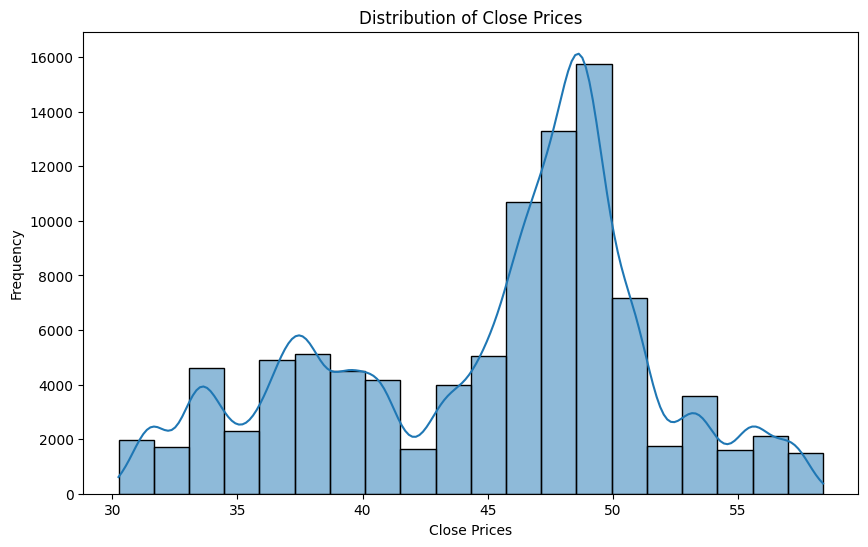

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=20, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Prices')
plt.ylabel('Frequency')
plt.show()

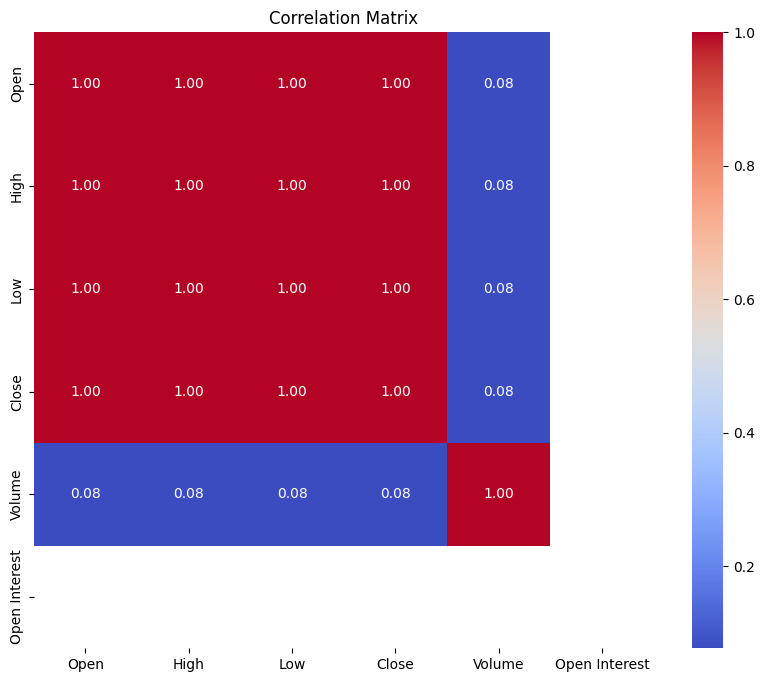

In [9]:
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

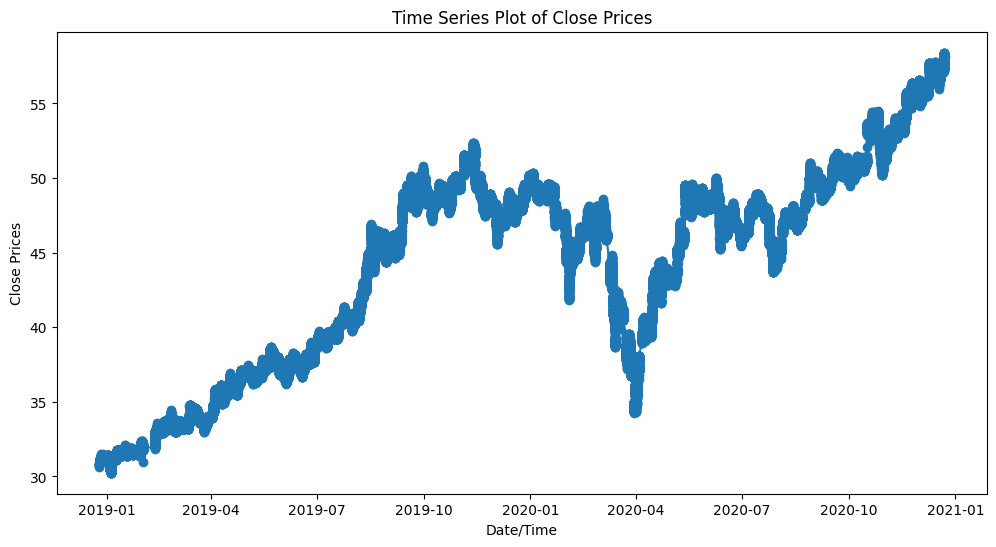

In [11]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(12, 6))
plt.plot(data['Date/Time'], data['Close'], marker='o')
plt.title('Time Series Plot of Close Prices')
plt.xlabel('Date/Time')
plt.ylabel('Close Prices')
plt.show()

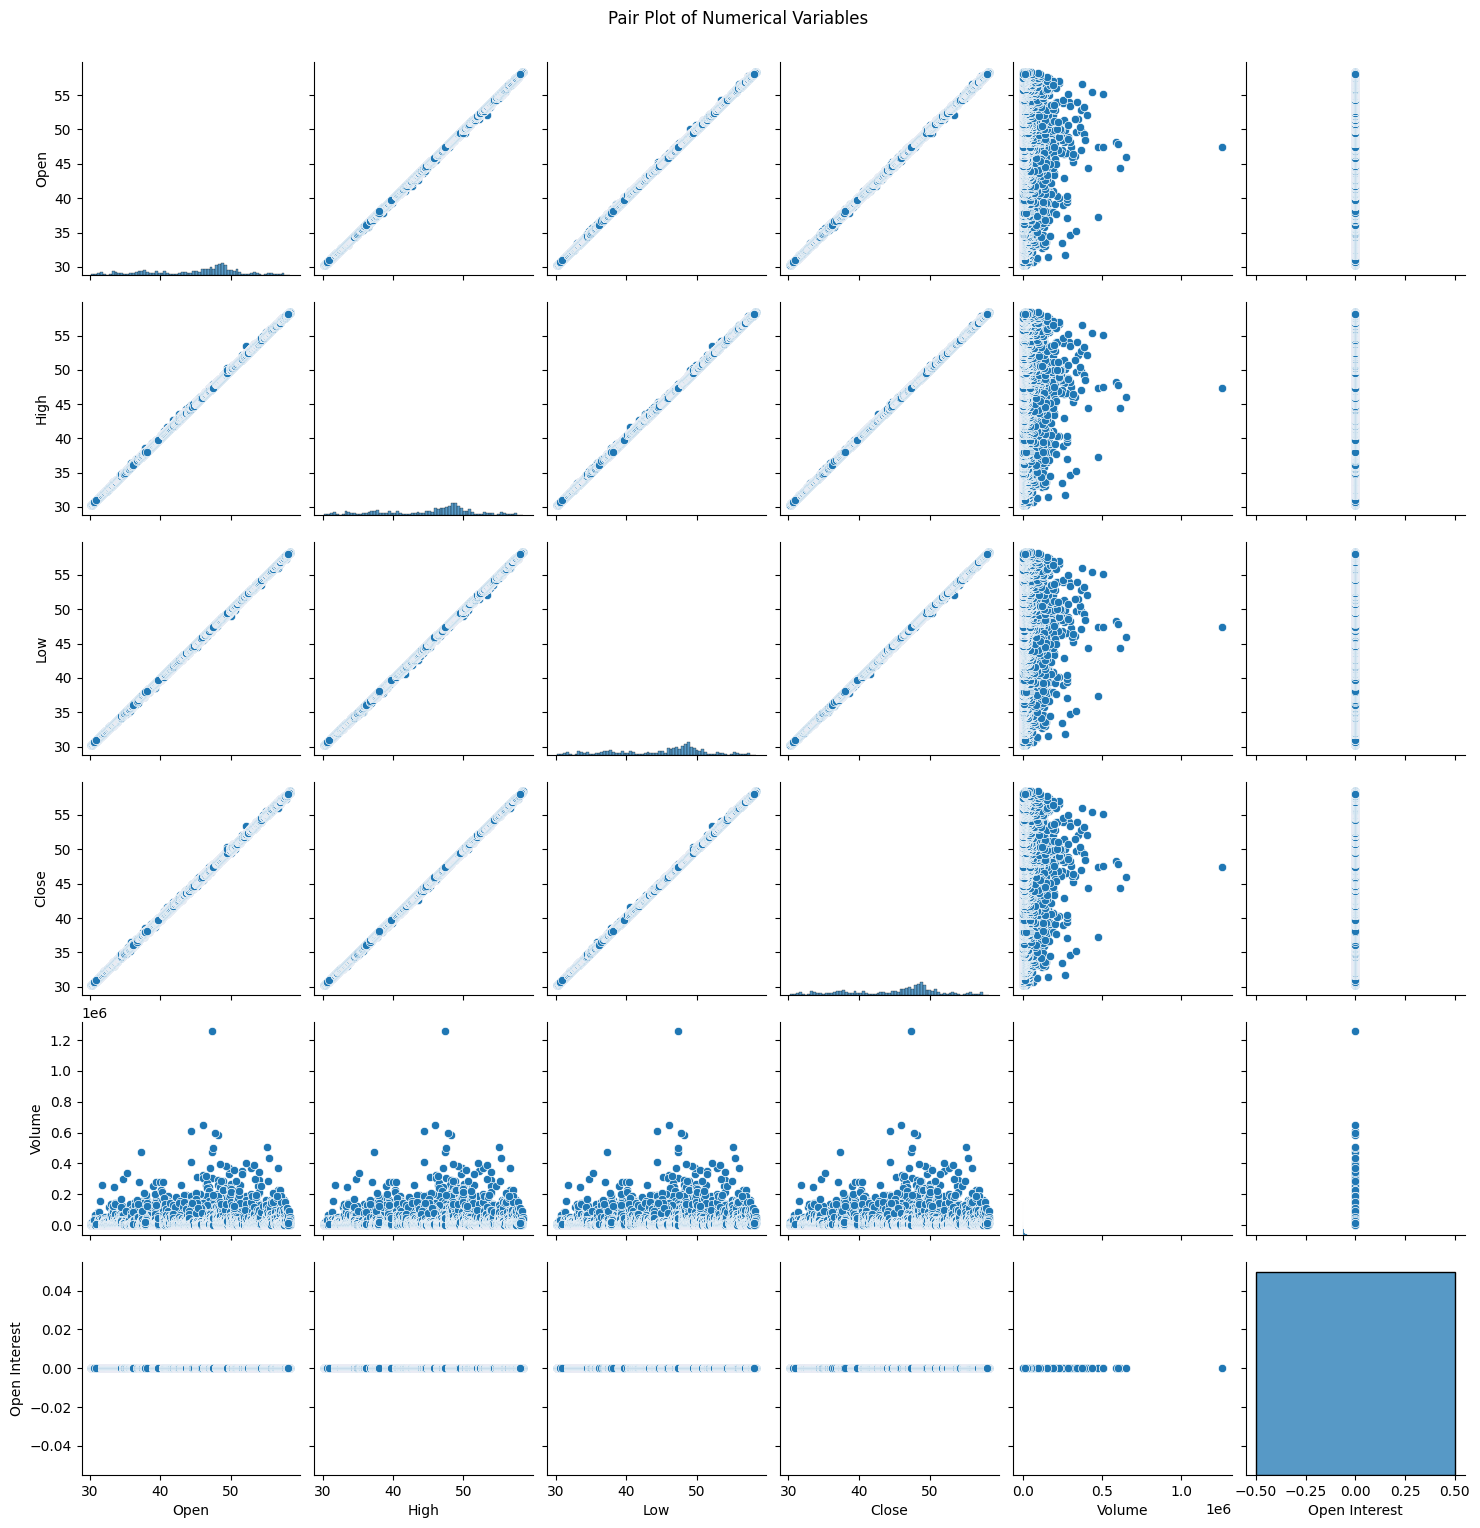

In [12]:
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume', 'Open Interest']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

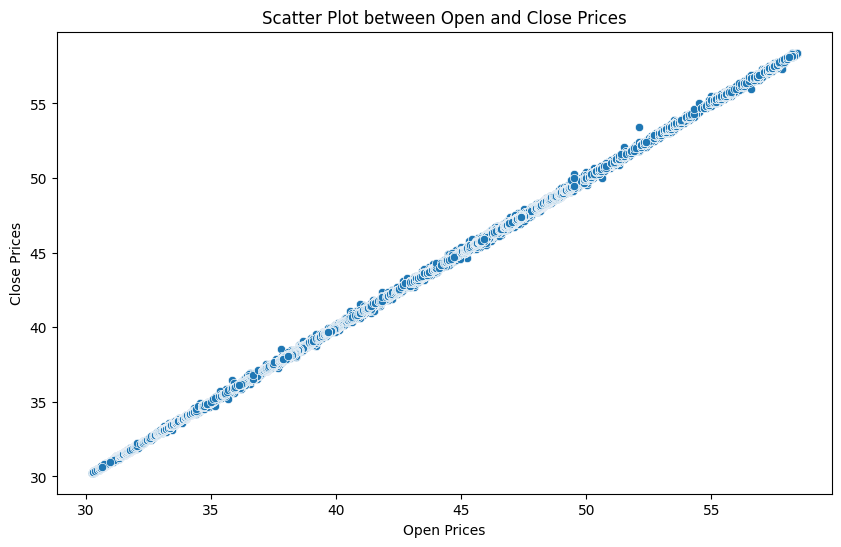

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=data)
plt.title('Scatter Plot between Open and Close Prices')
plt.xlabel('Open Prices')
plt.ylabel('Close Prices')
plt.show()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_1, target, test_size=0.2, random_state=42)

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0010293849033004017


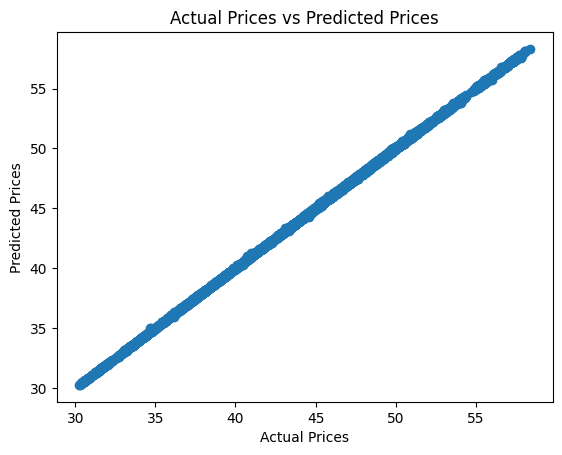

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()